# 1. 데이터 수집 및 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('internet_service_churn.csv')


# 2. 데이터 구조 및 변수 이해

In [3]:
print(df.info())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB
None
(72274, 11)


- 행/열 수 : 72274행 11열
- float 4개, int 7개
- 고유 식별값1개, 이진형 3개, 수치 범주형 2개, 연속형 5개
- 타겟 : churn


In [4]:
# churn 0 / 1 양 비교
churn_count = df['churn'] == 1
churn_count.sum()  # 0 (32224)  1 (40050)

np.int64(40050)

- 컬럼 설명

 0   id                             고유 구독자 ID

 1   is_tv_subscriber               TV 구독 여부

 2   is_movie_package_subscriber	영화 패키지 구독 여부

 3   subscription_age               구독 기간

 4   bill_avg                       지난 3개월 평균 청구 금액

 5   reamining_contract             계약의 남은 연수
 (null 일 경우 계약 x, 계약 기간이 끝나기 전 취소 시 위약금)

 6   service_failure_count          지난 3개월간 서비스 장애로 인한 콜센터 고객 통화 횟수

 7   download_avg                   지난 3개월 인터넷 사용량(GB)

 8   upload_avg                     지난 3개월 평균 업로드(GB)
 (The average usage of downloads and uploads over the last three months is within the 3GB limit)

 9   download_over_limit            지난 9개월 동안의 "다운로드 제한 초과 횟수"
 (제한 초과시 추가 요금 지불해야함.)

 10  churn                          서비스 취소 여부

# 3.데이터 요약 및 통계

In [5]:
print(df.describe())

                 id  is_tv_subscriber  is_movie_package_subscriber  \
count  7.227400e+04      72274.000000                 72274.000000   
mean   8.463182e+05          0.815259                     0.334629   
std    4.891022e+05          0.388090                     0.471864   
min    1.500000e+01          0.000000                     0.000000   
25%    4.222165e+05          1.000000                     0.000000   
50%    8.477840e+05          1.000000                     0.000000   
75%    1.269562e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  reamining_contract  \
count      72274.000000  72274.000000        50702.000000   
mean           2.450051     18.942483            0.716039   
std            2.034990     13.215386            0.697102   
min           -0.020000      0.000000            0.000000   
25%            0.930000     13.000000            0.000000   
50%

구독 기간 최소값이 음수

# 4.결측치 및 이상치 탐색 , 8. 데이터 전처리

In [6]:
# 고유 식별값인 id 컬럼 삭제
df= df.drop('id', axis= 1)

 - reamining contract 특성 remaining contract의 오타로 판단.

In [7]:
df.rename(columns={'reamining_contract': 'remaining_contract'}, inplace=True)

In [8]:
# 변경된 컬럼명 확인
print(df.columns)

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'remaining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit', 'churn'],
      dtype='object')


### 이상치 확인 & 제거


describe에서 구독기간인 'subscription_age' 항목에서 최소값이 음수인 것을 확인.

In [9]:
# subscription_age 컬럼의 최소값 확인
min_age = df['subscription_age'].min()
print(min_age)


-0.02


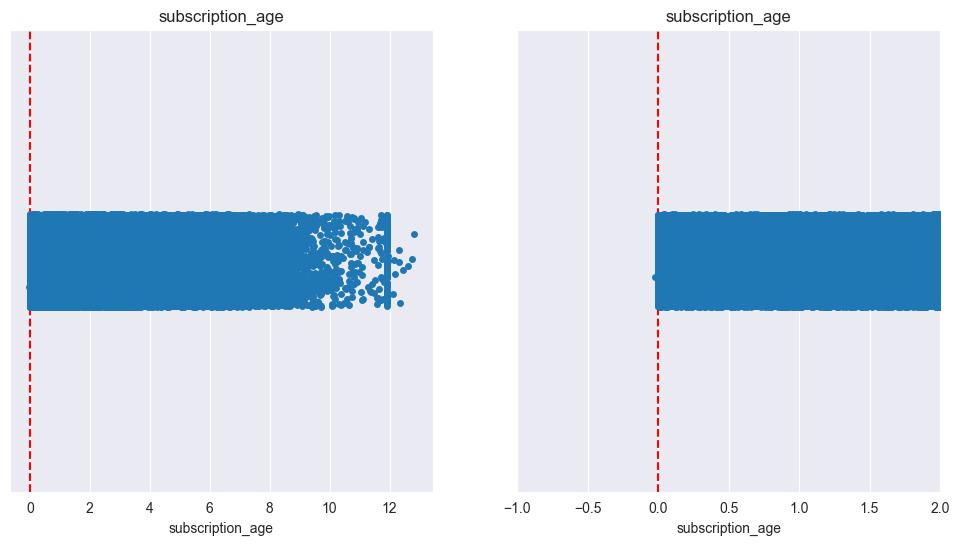

In [10]:
plt.figure(figsize = ( 12, 6))

plt.subplot(121)
sns.stripplot(x=df['subscription_age'], jitter=True)
plt.axvline(0, color='red', linestyle='--')  # 음수 기준선
plt.title("subscription_age")

plt.subplot(122)
sns.stripplot(x=df['subscription_age'], jitter=True)
plt.axvline(0, color='red', linestyle='--')  # 음수 기준선
plt.title("subscription_age")
plt.xlim(-1, 2)  # 축 범위 좁히기
plt.show()

In [11]:
# 이상치 제거 DataFrame 갱신
df= df[df['subscription_age'] >= 0]

# 이상치 제거 후 행 수 반환 -> 72273
print(df.shape[0])

# subscription_age 컬럼의 최소값 확인 -> 0.0
min_age = df['subscription_age'].min()
print(min_age)

72273
0.0


### 결측치 처리

In [12]:
df.isna().sum()

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

 - remaining contract 결측치 21572

 - download_avg, upload_avg 결측치 381

remaining_contract = null -> 잔여 계약 기간 x

현재 값의 기준은 year 단위,

1년을 365로 나눌 경우 약 0.002739 == 약 0.00274 --> 소수점 2자리까지 표기가 불가능한 day 단위의 남은 계약의 경우 0으로 표기되었을 가능성

1일을 0.00274로 추측할 경우 0.01은 대략 3.6일 즉 4일 정도로 예측 가능

그러므로 현재 측정값 약 4일 이상의 계약이 남았을 경우만 0.01 이상의 값으로 표기하고 그 이하는 0으로 표기해놨다고 추측,

0값으로 표기된 관측값은 3일 미만으로 계약이 남은 경우라고 판별하고 null인 값들을 진짜 계약이 만료된 경우로 판별하는 것이 조금 더 합리적인 판단,

하지만 더 분석해본 결과 0으로 관측되는 값들의 churn이 거의 모두 1 (이탈)로 분류 되는 것으로 보아 그냥 계약 만료로 봐도 무방할 것으로 판단

In [13]:
# 이탈 하지 않았지만 잔여계약이 null 값인 항목
condition = (df['churn'] == 0) & (df['remaining_contract'].isnull())

# 이탈 하지 않았지만, 잔여계약이 0인 경우
condition2 = (df['churn'] == 0)  & (df['remaining_contract'] == 0)

# 이탈 하지 않았지만, 잔여계약이 0인 경우
condition3 = (df['churn'] == 1)  & (df['remaining_contract'] == 0)

# 이탈 x 잔여계약 null    -> 1853
condition_count = condition.sum()
print('이탈 x 잔여계약 null: ', condition_count)

# 이탈 x 잔여계약 0       -> 72
condition2_count = condition2.sum()
print('이탈 x 잔여계약 0 : ', condition2_count)

# 이탈 o 잔여계약 0       -> 16291
condition3_count = condition3.sum()
print('이탈 o 잔여계약 0 : ', condition3_count)

이탈 x 잔여계약 null:  1853
이탈 x 잔여계약 0 :  72
이탈 o 잔여계약 0 :  16291


#### 이탈 x . 잔여 계약 기간  null -> 0으로 처리

In [14]:
# dl avg ul avg도  72,273개 중 381개 0.53%로 모델 학습에 영향 거의 없을것으로 판단
# remaining_contract, dl_avg, ul_avg null 값 0으로 채우기

df = df.fillna(0)
df.isna().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

# 5. 변수 분포 시각화 6. 변수 간 관계 시각화

### 이진형 변수 vs Churn

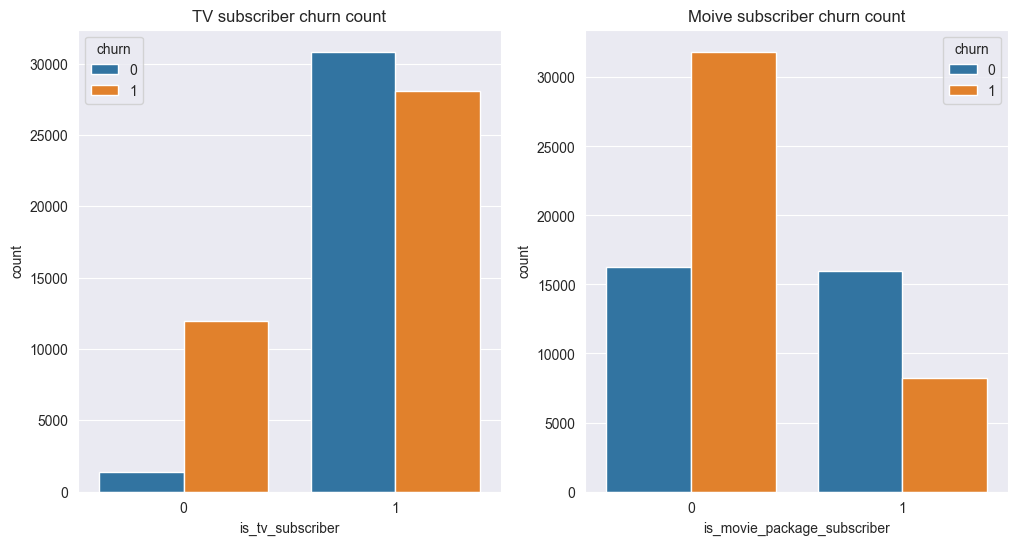

In [15]:
plt.figure(figsize = ( 12, 6))

plt.subplot(121)
sns.countplot(data=df, x='is_tv_subscriber', hue='churn')
plt.title("TV subscriber churn count")


plt.subplot(122)
sns.countplot(data=df, x='is_movie_package_subscriber', hue='churn')
plt.title("Moive subscriber churn count")
plt.show()



### 수치 범주형 변수 vs Churn

#### download_over_limit

0을 제외한 데이터만 선택

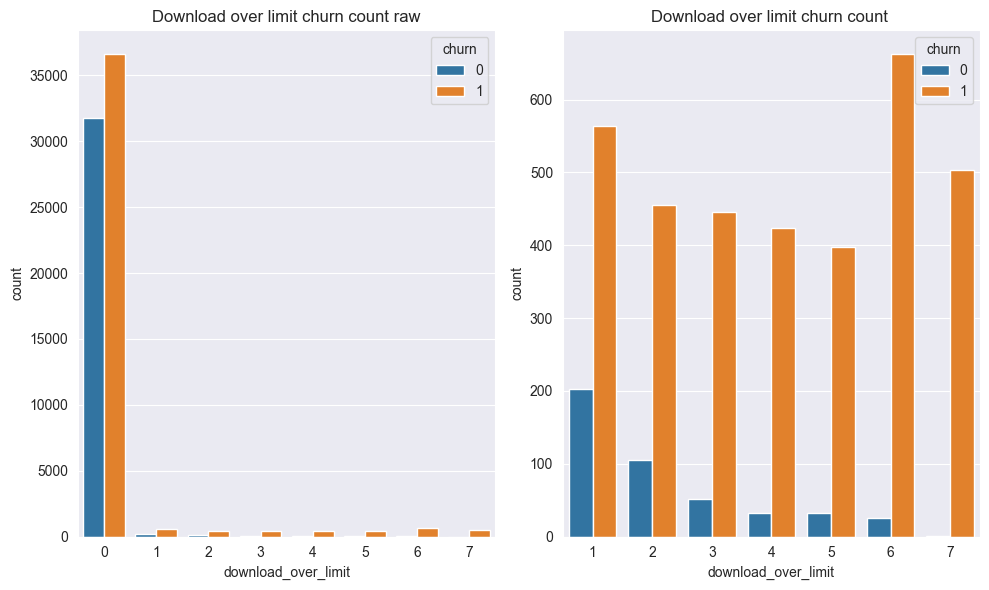

In [16]:
filtered_download_over_limit_df = df[~df['download_over_limit'].isin([0])]

plt.figure(figsize=(10,6))


plt.subplot(1, 2, 1)
sns.countplot(data=df, x='download_over_limit', hue='churn')
plt.title("Download over limit churn count raw")

plt.subplot(1, 2, 2)
sns.countplot(data=filtered_download_over_limit_df, x='download_over_limit', hue='churn')
plt.title("Download over limit churn count ")

plt.tight_layout()
plt.show()


### 연속형 변수 vs Churn

#### subscribtion age viloin plot

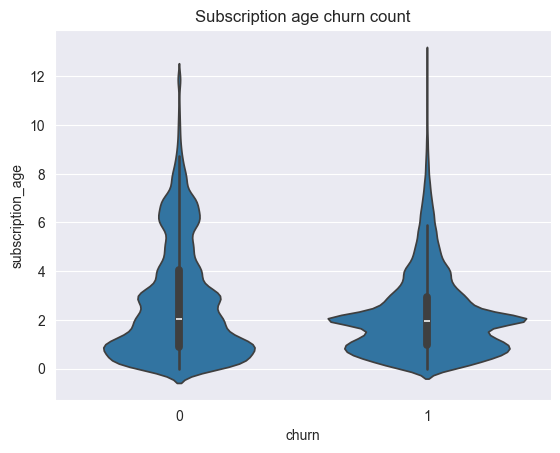

In [17]:

sns.violinplot(data=df, x='churn', y='subscription_age')
plt.title("Subscription age churn count")
plt.show()

구독 기간 2년까지에서 이탈 ↑
이후 기간에서 ↓

#### download & upload avg.

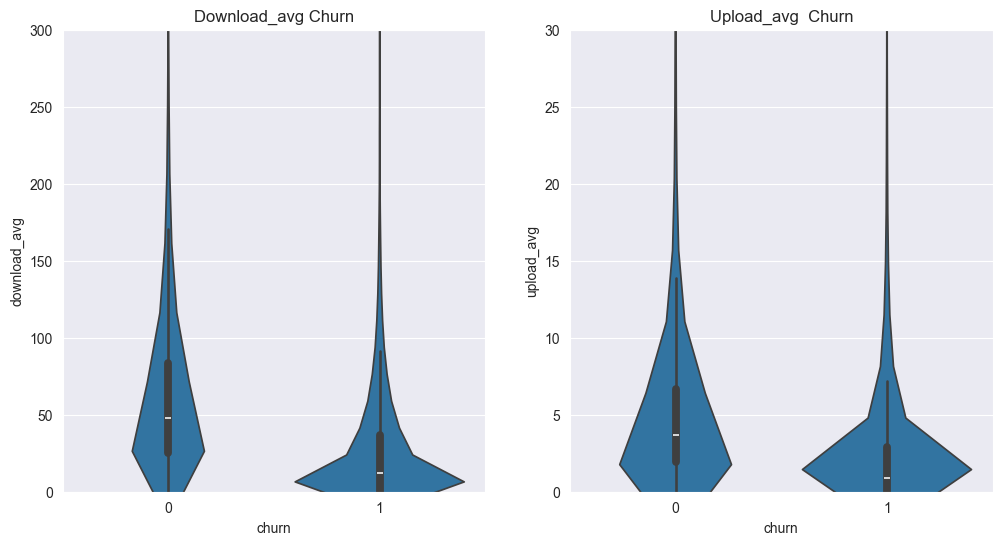

In [18]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='churn', y='download_avg')
plt.title("Download_avg Churn")
plt.ylim(0, 300)

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='churn', y='upload_avg')
plt.title("Upload_avg  Churn")
plt.ylim(0, 30)
plt.show()

이탈고객 대부분이 사용량이 거의 없음.

#### remaining contract viloin plot

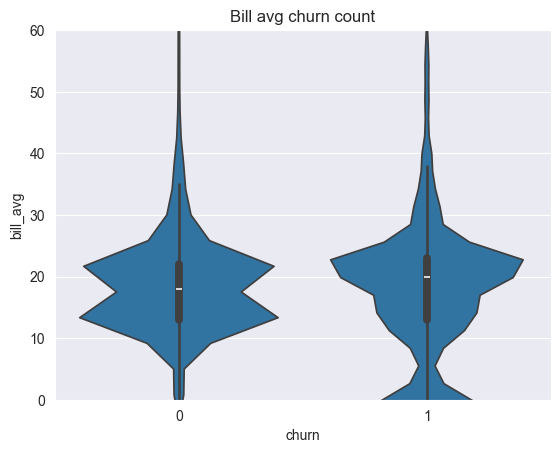

In [22]:

sns.violinplot(data=df, x='churn', y='remaining_contract')
plt.title("Remaining contract churn count")
plt.show()

이탈고객 대부분 잔여 계약 X

### 컬럼을 묶어 시각화

#### download_avg, upload_avg 묶어서 시각화

데이터가 x축인 download_avg 1000, y축인 upload_avg 200 안에 많이 모여있어서 잘 나타나지 않는 것 같음

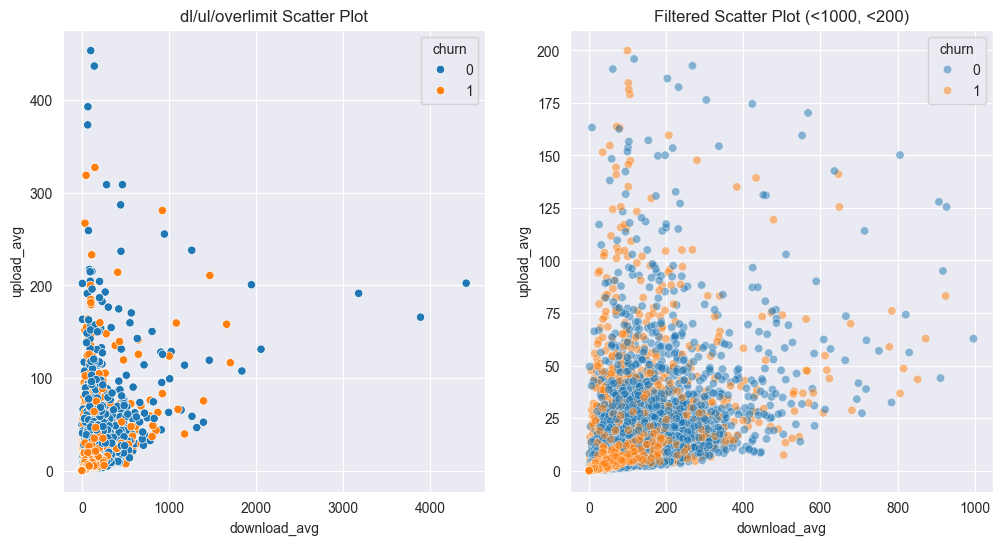

In [40]:
filtered_df = df[(df['download_avg'] < 1000) & (df['upload_avg'] < 200)]

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'download_avg', y = 'upload_avg', hue = 'churn')
plt.title("dl/ul/overlimit Scatter Plot")


plt.subplot(1, 2, 2)
sns.scatterplot(data=filtered_df, x='download_avg', y='upload_avg', hue='churn', alpha=0.5)
plt.title("Filtered Scatter Plot (<1000, <200)")
plt.show()

upload와 download 모두 없거나 적은 회원의 이탈이 몰려있음.

0을 벗어난 구간의 회원 이탈률이 낮은 경향

# 07.상관관계 및 교차분석

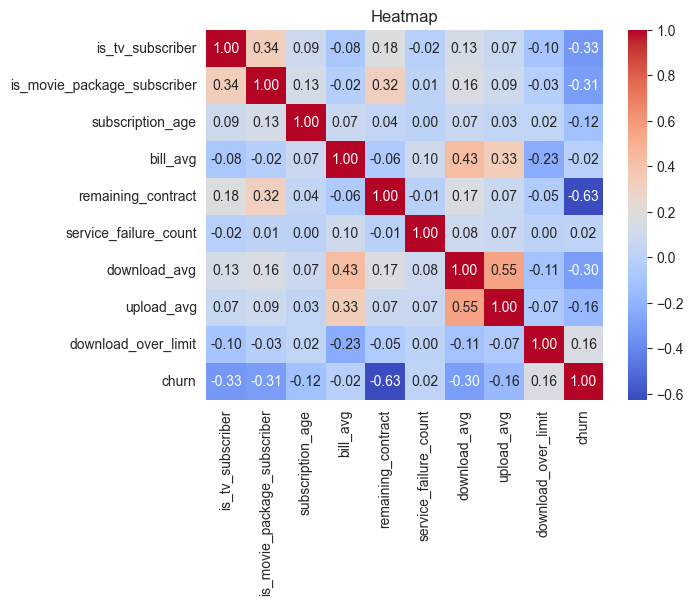

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap")
plt.show()

#### 상관관계가 있는 주요 특성

- target인 churn과 양의 상관관계 :  download_over_limit(0.16)

- target인 churn과 음의 상관관계 : remaining_contract(-0.63), is_tv_subscriber(-0.33), is_movie_package_subscriber(-0.31), download_avg(-0.30), upload_avg(-0.16) subscription_age(-0.12)

# 9. Feature Engineering

- 현재 시각화 분석시 TV 구독, 영화 구독에 대해 각각 이탈 or 유지만 분석함,
- 하지만, TV 구독과 영화 구독을 둘 다 하지 않는 경우, 둘 다 하는 경우, 하나만 하는 경우로 데이터들이 기록되어있기 때문에 새롭게 subscription_status 라는 column을 만들어서
0. : 구독 없음
1. : TV 구독
2. : 영화 구독
3. : 둘 다 구독


과 같은 형태로 새로 만드는 방법으로 새롭게 상관성을 찾고 시각화하여  확인하는게 좋지 않을까 라는 의문에서 새로운 컬럼 생성

In [43]:
# 새로운 컬럼 생성
df['subscription_status'] = df['is_tv_subscriber'] + df['is_movie_package_subscriber'] * 2

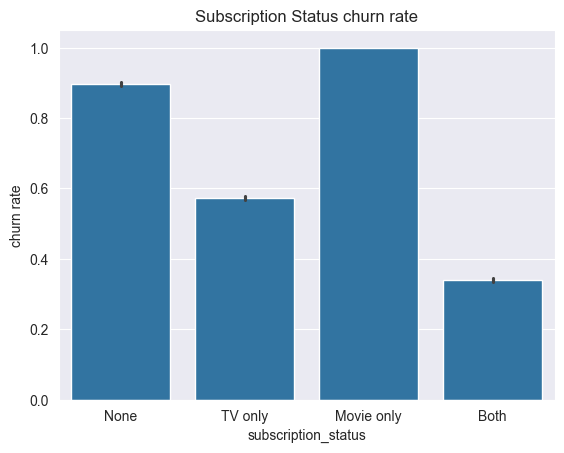

In [44]:
# 시각화로 이탈률 확인

sns.barplot(data=df, x='subscription_status', y='churn')
plt.title("Subscription Status churn rate")
plt.xticks(ticks=[0,1,2,3], labels=['None', 'TV only', 'Movie only', 'Both'])
plt.ylabel("churn rate")
plt.show()

두 항목 모두 구독한 구독자의 이탈률이 현저히 낮은 것을 확인.

None에서의 이탈률도 높았지만, 영화만 구독한 구독자의 이탈률이 1로 나타난 것이 이상하여 항목별 이탈자 수로 확인.

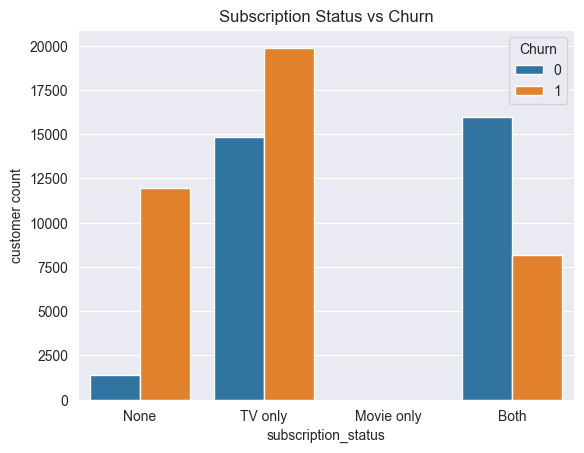

In [45]:
# 시각화로 이탈자 수 확인

sns.countplot(data=df, x='subscription_status', hue='churn')
plt.title("Subscription Status vs Churn")
plt.xticks(ticks=[0,1,2,3], labels=['None', 'TV only', 'Movie only', 'Both'])
plt.ylabel("customer count")
plt.legend(title="Churn")


plt.show()

이탈자 수 시각화 했을 하나도 구독을 안한 집단과 둘 다 구독한 집단의 이탈자 수 차이가 확연하게 보임.

영화만 구독하는 사람들은 그래프에서 보이지 않음.

정확한 이탈자 수 확인을 위해 테이블로 확인

In [46]:
# 집단별 인원 확인
subscription_map = {
    0: 'None',
    1: 'TV only',
    2: 'Movie only',
    3: 'Both'
}

df['subscription_status_label'] = df['subscription_status'].map(subscription_map)

# 이탈 여부와 함께 그룹별 고객 수 확인
grouped = df.groupby(['subscription_status_label', 'churn']).size().unstack(fill_value=0)
print(grouped)

churn                          0      1
subscription_status_label              
Both                       15990   8193
Movie only                     0      2
None                        1386  11963
TV only                    14848  19891


영화만 단일로 구독하는 사람은 2명

대부분의 고객은 TV만 구독하거나, TV + 영화 패키지를 함께 사용하고 있음

movie only를 선택한 고객은 72,000명 중 2명 → 0.003% 수준

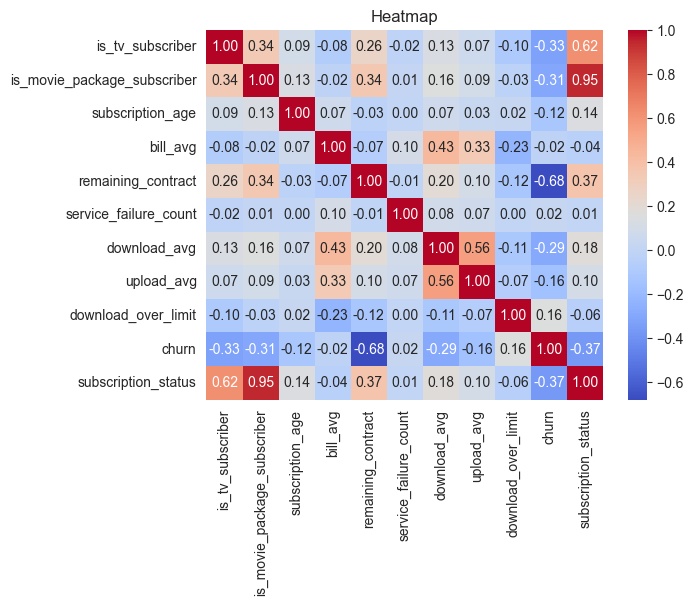

In [76]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap with subscription status")
plt.show()

TV와 영화 구독자들을 묶은 새로운 컬럼인 subscription에서

기존 TV 구독과 영화구독 단일 항목에서의 상관관계보다 높은 0.37의 음의 상관관계가 나타남을 확인.

# 10. 최종 요약 및 인사이트 도출

## 데이터 요약 및 인사이트

- TV와 영화를 구독중인 고객의 이탈률이 상대적으로 낮음 → 부가서비스 제공이 이탈 방지에 효과적임을 알 수 있음.

- remaining_contract가 있을 때 이탈률이 낮음 -> 계약기간 도중 해약 시 패널티가 있는 현 제도가 계약 유지에 효과적으로 작용하고 있음

- download_avg 와 이탈률의 음의 상관관계 -> 데이터 사용량이 이탈 방지에 작용

### 향후 분석/모델링 방향

- 군집 분석: 고객 데이터 사용량 세분화를 통한 타겟

- 서비스 품질 지표 강화 & 수정: remaining_contract, is_tv_subscriber & is_movie_package_subscriber를 묶은 subscription status 등과 이탈의 연관성 모델링 강화, 기존 컬럼 삭제 고려

- remaining_contract 의 상관관계가 다른 항목들보다 확연히 큼. 이후 학습과정에서 remaining contract만으로도 학습이 되는 상황이 초래될 수 있어서 주의해야함.

## 이탈률 감소 대책

### 1. TV & 영화 번들 서비스 유도
분석 근거: TV와 Movie를 둘 다 구독할 때 이탈률 감소에 유의미한 수치가 나타남.

대책:

- TV/영화 패키지 결합 시 할인 제공

- 신규 고객 대상 TV & 영화 무료 체험 제공



### 2. 계약 유도 전략
분석 근거: remaining_contract가 있을 때 이탈률이 낮음

대책:

- 무계약 고객 대상으로 장기 계약 유도 + 사은품/할인 제공

- 계약 기간 만료 직전 자동 리마인드 및 재계약 유도

- 계약 종료 예정자 대상 맞춤 마케팅

### 3. 다운로드 용량별 맞춤 대응 전략
분석 근거 : download data 가 적정량 있을 경우 이탈률이 낮지만 download over limit이 많을 경우 이탈률이 높은 경향을 보임

대책 :
- 데이터 사용량에 따른 고객 세분화 대응

| 고객 유형     | 특징                                                | 이탈률 | 행동 패턴              |
| --------- | ------------------------------------------------- | --- | ------------------ |
| 일반 사용자    | 보통 수준의 다운로드 사용                                    | 낮음  | 꾸준히 사용, 이탈 가능성 낮음  |
| ** 헤비유저** | 평균보다 훨씬 높은 `download_avg` & `download_over_limit` | 높음  | 초과요금에 민감, 불만족 시 이탈 |

-  초과요금 발생 고객 분석을 기반으로 무제한 요금제 / 패키지 리디자인
- 사용량 초과 전 알림 & 제어 시스템 강화
    : 일정 한계치 접근 시 사전 경고 메시지 자동 발송
    한도 초과 시 자동으로 데이터 속도 제한 or 추가 사용 동의 팝업 → 불만 예방



